In [1]:
!which python3

/Users/karthikmaddukuri/anaconda3/envs/churn-model/bin/python3


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Standard imports
from collections import Counter
import datetime
import os
import pickle
import sys
sys.path.append('..')  #To let jupyter notebook to look one folder up

#Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import ( AdaBoostClassifier, GradientBoostingClassifier, 
                              RandomForestClassifier
                             )
from sklearn.inspection import plot_partial_dependence
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  ( cross_val_score, GridSearchCV, 
                                      learning_curve, RandomizedSearchCV,
                                      train_test_split
                                     )
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


#Local imports
from src.localpaths import *
from src.data.make_dataset import load_training_data
from src.models.train_model import *
from src.visualization.visualize import plot_learning_curve

In [4]:
#Configuration for notebooks

# pd.options.display.max_columns = 100
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Load Featurized Data 

In [5]:
X_train, y_train = load_training_data(final=True)

# Load model results

In [6]:
model_results = load_model_results()

In [7]:
model_results.sort_values(by='roc_auc', ascending=False)

,model_filename,model_string,accuracy,precision,recall,f1,roc_auc
33,201006169414151680.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.802724,0.669380,0.495683,0.569039,0.846669
32,1338764528172069376.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800828,0.659652,0.502878,0.570043,0.845129
4,1017545180110469376.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800828,0.659652,0.502878,0.570043,0.845129
5,1126852098189955072.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800828,0.659652,0.502878,0.570043,0.845129
31,811529812254492928.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800828,0.659652,0.502878,0.570043,0.845129
11,1509884050712260864.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
24,158305255602119168.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
1,2241896888290486528.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
15,382662255737366528.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
28,2183524338018462976.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914


# Load pickled AdaBoostClassifier model and check learning curves

In [8]:
model = load_pickled_model('2241896888290486528.pkl')

In [9]:
model

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [10]:
print_model_results(model, X_train, y_train)

accuracy: 0.80
precision: 0.65
recall: 0.52
f1: 0.58
roc_auc: 0.84


/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/utils/vali

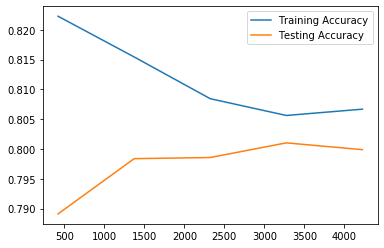

In [11]:
plot_learning_curve(model, X_train, y_train, zoom_out=False)

# Inspecting hyperparameters

### Manual experiment with n_estimators

In [12]:
model = AdaBoostClassifier(n_estimators=100)
print_model_results(model, X_train, y_train)

accuracy: 0.80
precision: 0.65
recall: 0.52
f1: 0.58
roc_auc: 0.84


### Manual experiment with learning rates

In [13]:
model = AdaBoostClassifier(learning_rate=0.1)
print_model_results(model, X_train, y_train)

accuracy: 0.79
precision: 0.71
recall: 0.32
f1: 0.44
roc_auc: 0.84


In [14]:
model = AdaBoostClassifier(learning_rate=10)
print_model_results(model, X_train, y_train)

accuracy: 0.26
precision: 0.26
recall: 1.00
f1: 0.42
roc_auc: 0.33


In [15]:
model = AdaBoostClassifier(learning_rate=0.6)
print_model_results(model, X_train, y_train)
store_model_and_results(model, X_train, y_train)

accuracy: 0.80
precision: 0.66
recall: 0.50
f1: 0.57
roc_auc: 0.85


## Using RandomSearch for optimizing the model

In [17]:
model = AdaBoostClassifier()
param_grid = {'n_estimators': list(np.arange(1,201)), 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0,6, 0.7, 0.8, 0.9,\
                                                                        1, 3, 5, 7, 9, 10]}
randoms_model = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, scoring='roc_auc' )
randoms_model.fit(X_train, y_train)
print(randoms_model)

/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/utils/vali

/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/utils/vali

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0, 6, 0.7, 0.8,
                                                          0.9, 1, 3, 5, 7, 9,
                                                          10],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                   

In [18]:
print(randoms_model.best_estimator_, end = '\n\n')
print(f'The best hyperparameters for the model are {randoms_model.best_params_}', end='\n\n')
print(f'The best roc_auc score is {randoms_model.best_score_:}', end='\n\n')

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.3,
                   n_estimators=112, random_state=None)

The best hyperparameters for the model are {'n_estimators': 112, 'learning_rate': 0.3}

The best roc_auc score is 0.8466147105019932



In [19]:
results_df = pd.DataFrame(randoms_model.cv_results_)

In [20]:
results_df[['params','mean_test_score','rank_test_score']].sort_values(by='rank_test_score')

,params,mean_test_score,rank_test_score
0,"{'n_estimators': 112, 'learning_rate': 0.3}",0.846615,1
1,"{'n_estimators': 119, 'learning_rate': 0.2}",0.846436,2
6,"{'n_estimators': 95, 'learning_rate': 0.3}",0.846428,3
4,"{'n_estimators': 180, 'learning_rate': 0.3}",0.846187,4
7,"{'n_estimators': 135, 'learning_rate': 0.4}",0.846018,5
8,"{'n_estimators': 187, 'learning_rate': 0.8}",0.844850,6
9,"{'n_estimators': 13, 'learning_rate': 0.3}",0.836159,7
2,"{'n_estimators': 34, 'learning_rate': 6}",0.332220,8
5,"{'n_estimators': 189, 'learning_rate': 6}",0.332220,8
3,"{'n_estimators': 122, 'learning_rate': 0}",NaN,10


## Storing results of the best model

In [21]:
model = randoms_model.best_estimator_
print_model_results(model, X_train, y_train)
store_model_and_results(model, X_train, y_train)

accuracy: 0.80
precision: 0.67
recall: 0.50
f1: 0.57
roc_auc: 0.85
Fitting model before pickling


/Users/karthikmaddukuri/anaconda3/envs/churn-model/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


saving the pickled model to 201006169414151680.pkl
Writing model results to existing results csv file


# Load new model results

In [22]:
model_results = load_model_results()

In [23]:
model_results.sort_values(by='roc_auc', ascending=False)

,model_filename,model_string,accuracy,precision,recall,f1,roc_auc
33,201006169414151680.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.802724,0.669380,0.495683,0.569039,0.846669
32,1338764528172069376.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800828,0.659652,0.502878,0.570043,0.845129
4,1017545180110469376.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800828,0.659652,0.502878,0.570043,0.845129
5,1126852098189955072.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800828,0.659652,0.502878,0.570043,0.845129
31,811529812254492928.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800828,0.659652,0.502878,0.570043,0.845129
11,1509884050712260864.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
24,158305255602119168.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
1,2241896888290486528.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
15,382662255737366528.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
28,2183524338018462976.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.650880,0.520863,0.578054,0.844914
